In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [113]:
df = pd.read_csv('housing.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [114]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [115]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: xlabel='price', ylabel='Count'>

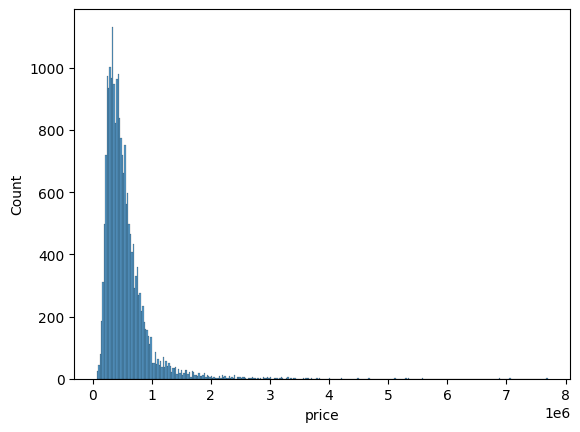

In [116]:
sns.histplot(df['price'])

In [117]:
X= df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [120]:
y_pred = model.predict(X_test)

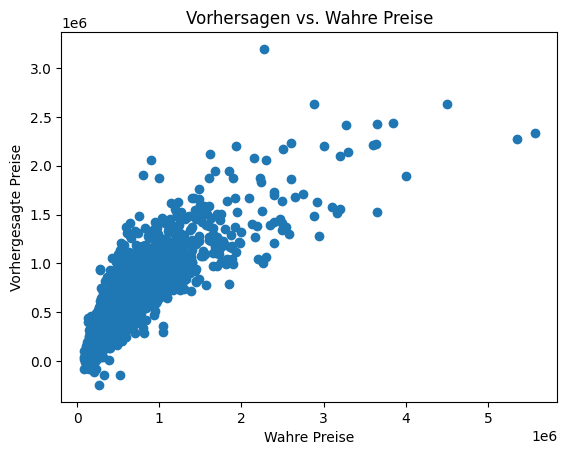

Mean Absolute Error: 127493.34488251616
Mean Squared Error: 45173046173.716125


In [121]:
# Modellbewertung
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Visualisierung der Vorhersagen
plt.scatter(y_test, y_pred)
plt.xlabel("Wahre Preise")
plt.ylabel("Vorhergesagte Preise")
plt.title("Vorhersagen vs. Wahre Preise")
plt.show()

# Ausgabe der Metriken
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

In [122]:
df['age'] = 2023 - df['yr_built']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,68
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,72
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,90
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,58
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,14
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,9
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,14
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,19


In [123]:
df['diff_sqft_lot_sqft_lot15'] = df['sqft_lot15'] - df['sqft_lot']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,diff_sqft_lot_sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,68,0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,72,397
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,90,-1938
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,58,0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,36,-577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,14,378
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,9,1387
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,14,657
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,19,-1101


In [124]:
df['gracon'] = df['grade'] - df['condition']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,diff_sqft_lot_sqft_lot15,gracon
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,68,0,4
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,72,397,4
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,90,-1938,3
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,58,0,2
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,36,-577,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,14,378,5
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,9,1387,5
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,14,657,4
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,19,-1101,5


In [125]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age',
       'diff_sqft_lot_sqft_lot15', 'gracon'],
      dtype='object')

In [126]:
A = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age',
       'diff_sqft_lot_sqft_lot15', 'gracon']]
b = df['price']

In [127]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [128]:
new_model = GradientBoostingRegressor()
new_model.fit(A_train, b_train)

GradientBoostingRegressor()

In [129]:
b_pred = new_model.predict(A_test)

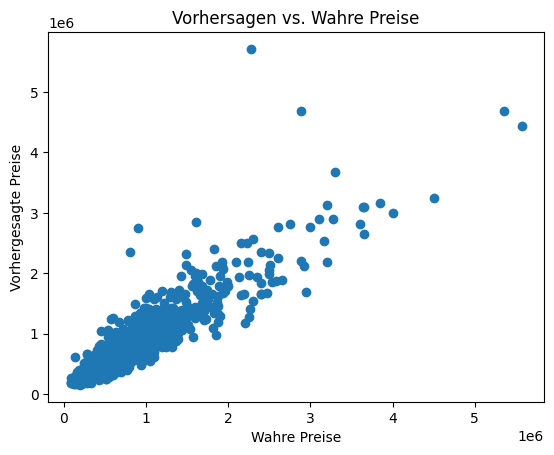

Mean Absolute Error: 81344.97528600927
Mean Squared Error: 22353524981.194492


In [130]:
# Modellbewertung
mae = mean_absolute_error(b_test, b_pred)
mse = mean_squared_error(b_test, b_pred)

# Visualisierung der Vorhersagen
plt.scatter(b_test, b_pred)
plt.xlabel("Wahre Preise")
plt.ylabel("Vorhergesagte Preise")
plt.title("Vorhersagen vs. Wahre Preise")
plt.show()

# Ausgabe der Metriken
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

In [131]:
import datetime as dt
date = pd.to_datetime(df['date'])
df['year'] = date.dt.year
df['month'] = date.dt.month
df['day'] = date.dt.day

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,age,diff_sqft_lot_sqft_lot15,gracon,year,month,day
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,68,0,4,2014,10,13
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,47.7210,-122.319,1690,7639,72,397,4,2014,12,9
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,47.7379,-122.233,2720,8062,90,-1938,3,2015,2,25
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,47.5208,-122.393,1360,5000,58,0,2,2014,12,9
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,47.6168,-122.045,1800,7503,36,-577,5,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,47.6993,-122.346,1530,1509,14,378,5,2014,5,21
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,47.5107,-122.362,1830,7200,9,1387,5,2015,2,23
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,47.5944,-122.299,1020,2007,14,657,4,2014,6,23
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,47.5345,-122.069,1410,1287,19,-1101,5,2015,1,16


In [132]:
df = pd.get_dummies(df, columns=['zipcode'], prefix="zip")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,False,False,False,False,False,False,False,False,False,False
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,True,False,False,False,False,False,False,False,False,False
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
